In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [38]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

In [39]:
df=pd.read_csv("prepared_individual_data/Cough_Cold.csv",index_col=0,parse_dates=[0],date_parser=parser)

/home/manjit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [40]:
df.head()

,Cough_Cold
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

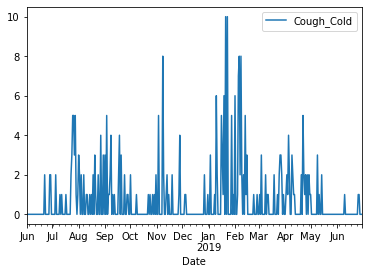

In [42]:
df.plot()

In [43]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

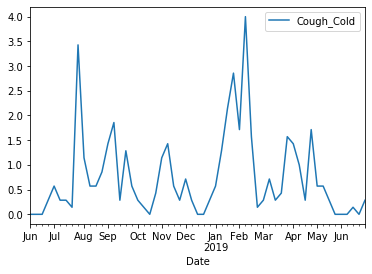

In [44]:
df_urti_weeklyM.plot()

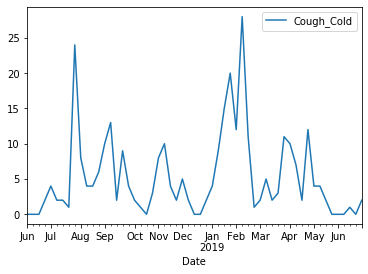

In [45]:
df_urti_weeklyS.plot()

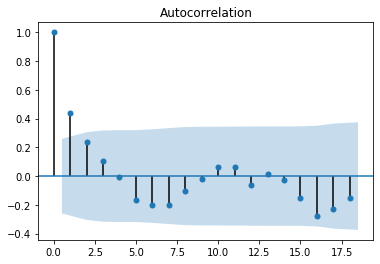

In [46]:
plot_acf(df_urti_weeklyM);

In [47]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

In [48]:
df_weekly.head()

,Cough_Cold
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,0.285714
2018-07-08,-0.285714


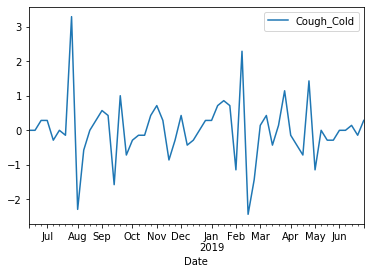

In [49]:
df_weekly.plot()

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
df_weekly.head()

,Cough_Cold
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,0.285714
2018-07-08,-0.285714


In [52]:
X=df_weekly['Cough_Cold'].values
result=adfuller(X)
print("ADF Statistic: %f" % result[0])
print("p-value:  %f" % result[1])
print('Critical values: ')
for key,value in result[4].items():
    print("\t%s: %.3f" % (key,value))
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is stationary")
else:
    print("Failed to reject Ho - Time Series is not stationary")

ADF Statistic: -10.313085
p-value:  0.000000
Critical values: 
	1%: -3.555
	5%: -2.916
	10%: -2.596
Reject Ho - Time Series is stationary


In [53]:
df_weekly.size

56

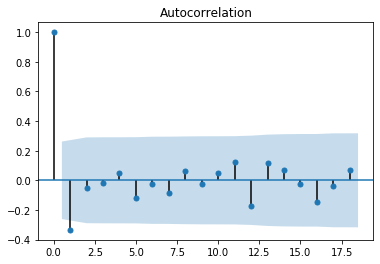

In [54]:
plot_acf(df_weekly);

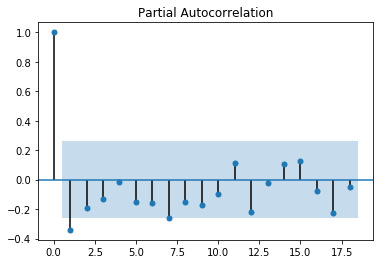

In [55]:
plot_pacf(df_weekly);

In [56]:
total=df_weekly
test_size=int(0.20*total.size)
train_size=total.size-test_size

In [57]:
test_size

11

In [58]:
train_size

45

In [59]:
total.size

56

In [60]:

train=total[:train_size]

In [61]:
test=total[train_size:]

In [62]:
train.size+test.size

56

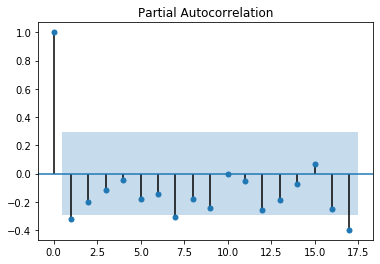

In [63]:
plot_pacf(train);

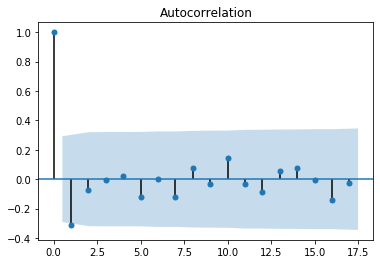

In [64]:
plot_acf(train);

In [65]:
from statsmodels.tsa.arima_model import ARMA

In [66]:
arma_model=ARMA(train,order=(10,2))
arma_model_fit=arma_model.fit()

/home/manjit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [67]:
arma_preds=arma_model_fit.predict(start=(train_size),end=(total.size-1))

In [68]:
arma_preds.size

11

In [69]:
arma_preds

2019-04-21    0.670124
2019-04-28   -0.495010
2019-05-05   -0.798482
2019-05-12    0.297016
2019-05-19    0.546707
2019-05-26   -0.330863
2019-06-02   -0.289264
2019-06-09    0.560847
2019-06-16    0.400088
2019-06-23   -0.347930
2019-06-30   -0.124793
Freq: W-SUN, dtype: float64

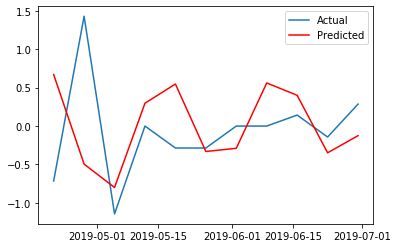

In [70]:
plt.plot(test,label='Actual')
plt.plot(arma_preds,color='red',label='Predicted')
plt.legend()

In [71]:
import pickle
from pickle_class_info import SerializableData
obj=SerializableData(train,arma_model_fit,'Cough')

In [72]:
f=open('model_'+obj.label,'wb')
pickle.dump(obj,f)
f.close()